# Data analysis of hydra customer base
The data set has been downloaded on the 14/01 and comes from bokeo



# First section - Cleaning the data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta
import seaborn as sns
from datetime import datetime, timedelta
import statistics
import datetime

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import pandas as pd
df = pd.read_csv("bookings.csv",encoding='cp1252')

#print(df.isnull().sum())

#creating new dataframe for use

cols_to_delete = ['Participants (details)',
                  'IP address',
                  'External ref.',
                  'Add a full service Cryo-air facial with skincare treatment?'
                 ]
new_data = df.drop(cols_to_delete, axis=1)

#Creating DD/MM/YYYY columns for start, end, created
new_data['Start'] = pd.to_datetime(new_data['Start'])
new_data['End'] = pd.to_datetime(new_data['End'])
new_data['Created'] = pd.to_datetime(new_data['Created'])
#start
new_data.insert(loc=2, column='start_year_month', value=new_data['Start'].map(lambda x: 100*x.year + x.month))
new_data.insert(loc=3, column='start_month', value=new_data.Start.dt.month)
# +1 to make Monday=1.....until Sunday=7
new_data.insert(loc=4, column='start_day', value=(new_data.Start.dt.dayofweek)+1)
new_data.insert(loc=5, column='start_hour', value=new_data.Start.dt.hour)

#end
new_data.insert(loc=7, column='end_year_month', value=new_data['End'].map(lambda x: 100*x.year + x.month))
new_data.insert(loc=8, column='end_month', value=new_data.End.dt.month)
# +1 to make Monday=1.....until Sunday=7
new_data.insert(loc=9, column='end_day', value=(new_data.End.dt.dayofweek)+1)
new_data.insert(loc=10, column='end_hour', value=new_data.End.dt.hour)

#created
new_data.insert(loc=11, column='created_year_month', value=new_data['Created'].map(lambda x: 100*x.year + x.month))
new_data.insert(loc=12, column='created_month', value=new_data.Created.dt.month)
# +1 to make Monday=1.....until Sunday=7
new_data.insert(loc=13, column='created_day', value=(new_data.Created.dt.dayofweek)+1)
new_data.insert(loc=14, column='created_time', value=new_data.Created.dt.time)

#need to define time of created_time
new_data['created_time'] = datetime.datetime.now().strftime("%H:%M:%S")


new_data.head(3)

,Booking number,Start,start_year_month,start_month,start_day,start_hour,End,end_year_month,end_month,end_day,end_hour,created_year_month,created_month,created_day,created_time,First name,Last name,Email address,Phone,Participants,Adults,Experience,MASSAGE CHAIR,FLOAT ROOMS,Product code,Private event,Status,Booking status,Promotion,Number of coupons,Coupons,Specific gift voucher,Prepaid credits,Prepaid package,Adjustments,Total adjustments,Total net,Iceland VAT (11%),Iceland VAT (24%),Total gross,Total paid,Total due,Participants (names),Created,Created by,Last changed,Last changed by,Canceled,Canceled by,Source
0,2556912184861030,2019-12-21 12:00:00,201912,12,6,12,2019-12-21 13:30:00,201912,12,6,13,201912,12,3,11:20:15,Arna,Run,arnarrun@gmail.com,6906916,1,1,Weightless Luxury Float,NaN,R1 ROOMS,R1A-STDFLOT,0,normal,NaN,10% DISCOUNT BY STAFF,NaN,NaN,NaN,0,NaN,NaN,NaN,"6,405.41",704.59,0.00,"7,110.00","7,110.00",0.00,NaN,2019-12-18 10:59:00,Ryan Kevinsson,18.12.2019 15:37,Hydra Spa - Desk,NaN,NaN,NaN
1,2556001137390103,2020-01-15 12:00:00,202001,1,3,12,2020-01-15 13:30:00,202001,1,3,13,202001,1,1,11:20:15,Daníel,Sigurðsson,daniel.gunnar.sigurdsson@gmail.com,8692108,1,1,Weightless Luxury Float,NaN,R1 ROOMS,R1A-STDFLOT,0,normal,NaN,15afsl,NaN,NaN,NaN,0,NaN,NaN,NaN,"6,049.55",665.45,0.00,"6,715.00","6,715.00",0.00,Daníel Sigurðsson,2020-01-13 20:34:00,CUSTOMER,NaN,NaN,NaN,NaN,NaN
2,2556001132171079,2020-01-15 11:45:00,202001,1,3,11,2020-01-15 12:00:00,202001,1,3,12,202001,1,1,11:20:15,Daníel,Sigurðsson,daniel.gunnar.sigurdsson@gmail.com,8692108,1,1,Therapeutic Massage Chair (15 minutes),MASSAGE CHAIR,NaN,R1A-NUDDSTOLL,0,normal,NaN,15afsl,NaN,NaN,NaN,0,NaN,NaN,NaN,"1,378.38",151.62,0.00,"1,530.00","1,530.00",0.00,NaN,2020-01-13 20:34:00,CUSTOMER,NaN,NaN,NaN,NaN,NaN


In [5]:
############
# NOT WORKING
# Need to find a way to create unique id for cust in order to do more analysis

# can use either phone or email as ID
############

#checking booking nubmers and unique values. The idea is to check if people have booked more than once.
#new_data['Booking number'].value_counts()
#there arent returning customer, yet

#creating fake customer ID
#need to create a customer_name to check with a participant_cust if it is equivalent. If yes, add a customer_ID
#customer_name = new_data['First name (customer)'] + '-' + new_data['Last name (customer)']
#participant_customer = new_data['First name (participant)'] + '-' + new_data['Last name (participant)']


#new_data['Customer_Index'] = [range(1, len(df) + 1) if customer_name == participant_customer else '--' for x in customer_name] 



# Some basics analysis
dates of the anlysis 
start => 10.11.2019 18:47
end => 14.01.2020 15:58

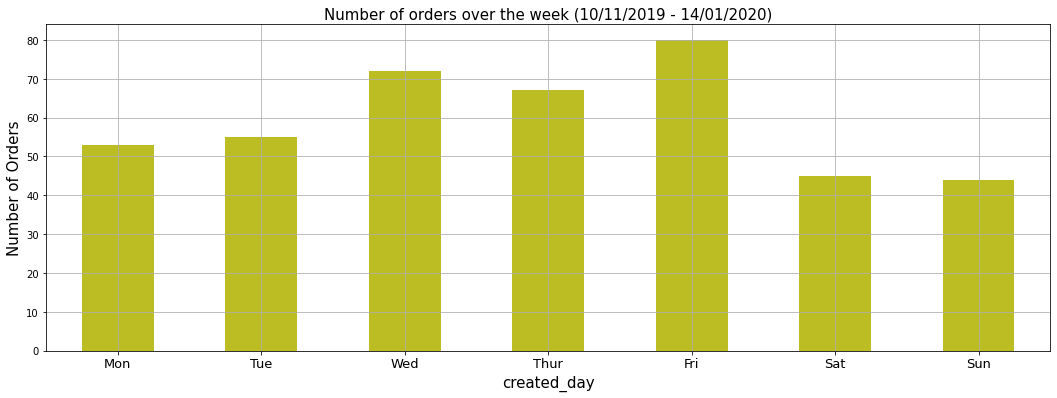

In [7]:
#Order per day of the week
color = sns.color_palette()
ax = new_data.groupby('Created')['created_day'].unique().value_counts().sort_index().plot(kind='bar',color=color[8],figsize=(18,6))
ax.grid(zorder=0)
ax.set_xlabel('created_day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders over the week (10/11/2019 - 14/01/2020)',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri', 'Sat', 'Sun'), rotation='horizontal', fontsize=13)

plt.show()

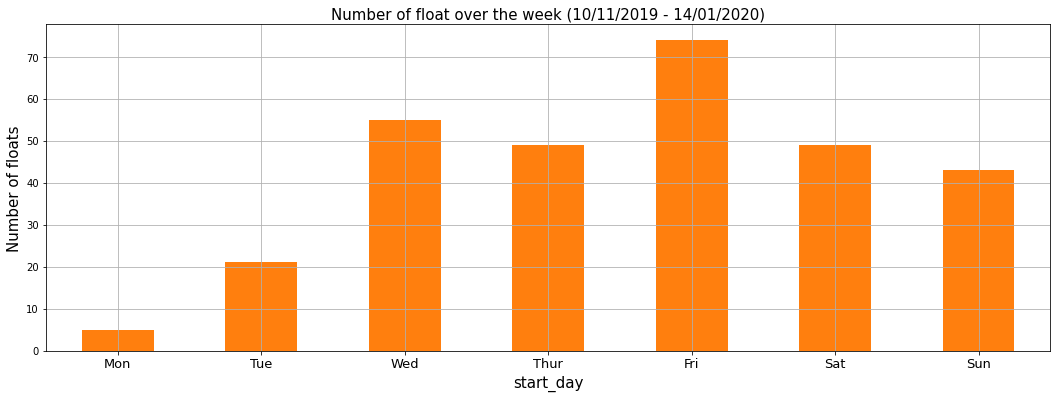

In [8]:
#float per day of the week
color = sns.color_palette()
ax = new_data.groupby('Start')['start_day'].unique().value_counts().sort_index().plot(kind='bar',color=color[1],figsize=(18,6))
ax.grid(zorder=0)
ax.set_xlabel('start_day',fontsize=15)
ax.set_ylabel('Number of floats',fontsize=15)
ax.set_title('Number of float over the week (10/11/2019 - 14/01/2020)',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri', 'Sat', 'Sun'), rotation='horizontal', fontsize=13)

plt.show()

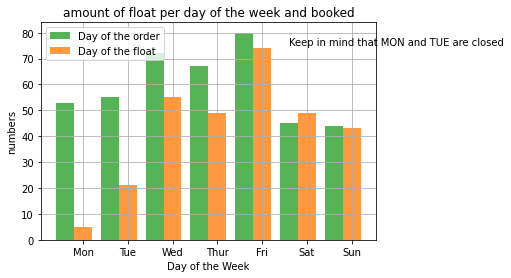

In [9]:
# data to plot
n_groups = 7
created_day = (new_data.groupby('Created')['created_day'].unique().value_counts().sort_index())
start_day = (new_data.groupby('Start')['start_day'].unique().value_counts().sort_index())

# create plot
fig, ax = plt.subplots()
ax.grid(zorder=0)
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.8
plt.figtext(.7, .8, "Keep in mind that MON and TUE are closed")

rects1 = plt.bar(index, created_day, bar_width,
alpha=opacity,
color=color[2],
label='Day of the order')

rects2 = plt.bar(index + bar_width, start_day, bar_width,
alpha=opacity,
color= color[1],
label='Day of the float')

plt.xlabel('Day of the Week')
plt.ylabel('numbers')
plt.title('amount of float per day of the week and booked')
plt.xticks(index + bar_width, ('Mon','Tue','Wed','Thur','Fri','Sat', 'Sun'))
plt.legend()
plt.show()

In [10]:
# Using plotly.express
import plotly.express as px
import pandas as pd

fig = px.line(df, x='created_time', y='new_data.groupby['created_hour'].unique().value_counts().sort_index())
fig.show()

SyntaxError: invalid syntax (<ipython-input-10-26436b4a00dd>, line 5)

In [24]:
#time of creation

color = sns.color_palette()
ax = new_data.groupby('Created')['created_hour'].unique().value_counts().sort_index().plot('bar',color=color[8],figsize=(18,6))
ax.grid(zorder=0)
ax.set_xlabel('created_day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Amount of order over the day (10/11/2019 - 14/01/2020)',fontsize=15)
ax.set_xticklabels(('01:00','02:00','03:00','04:00','05:00', '06:00', '07:00', '08:00', '07:00', '07:00', '07:00', '07:00', '07:00', '07:00', '07:00', '07:00', '07:00', '07:00', '07:00', '07:00', '07:00', '07:00', '07:00', '07:00'), rotation='horizontal', fontsize=13)

plt.show()

KeyError: 'Column not found: created_hour'

In [ ]:
new_data.head(3)

In [12]:
# number of participants
import statistics

pax = new_data['Participants']
statistics.mean(pax)


1.559718969555035

# RFM part